# Plotting minimum cost for 1D piecewise-deterministic Markov processes

### Specify example

In [1]:
# example = 1
example = 2

In [2]:
## Settings that are determined by example number 
if (example == 1):
    name = 'Basic'
elif (example == 2):
    name = 'SpeedTest'

### Import Packages


In [3]:
## General purpose
import numpy as np
import os

## Plotting-specific
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.animation as animation
from IPython.display import HTML

## Set plotting defaults
mathtextsize = 24
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=18)
plt.rcParams['savefig.bbox'] = 'tight'

### Read in data from file

In [4]:
## Location of C++ output
outputfolder = '../output/' + name
fdtype = np.dtype('f8')

## Grid sizes
gridsize = np.fromfile(outputfolder + '_Gridsizes', 'i4')
nx = gridsize[0]
ns = gridsize[1]
n_modes = gridsize[2]

## Step sizes
config = np.fromfile(outputfolder + '_Stepsizes', fdtype)
dx = config[0]
ds = config[1]
xmin = config[2]
xmax = config[3]
smax = config[4]

## Transition rates
Lambda = np.fromfile(outputfolder + '_lambda', fdtype)
Lambda = Lambda.reshape(n_modes,n_modes)

## Get data from each mode
W = np.zeros(gridsize)
for j in range(n_modes):
    modename = outputfolder + str(j)
    CDF   = np.fromfile(modename + '_CDF', fdtype)
    W[:,:,j] = CDF.reshape(nx,ns)
    
    
## Get min cost data
s0 = np.fromfile(outputfolder + '_MinCost', fdtype)
w0 = np.fromfile(outputfolder + '_MinCostProb', fdtype)
w0 = w0.reshape(nx,n_modes)

In [5]:
## Figures will be saved to Ex1/... or Ex2/...
## This code creates this directory if it does not already exist
write_directory = 'Ex' + str(example)
if not os.path.exists(write_directory):
    os.makedirs(write_directory)

# Plotting

### Plot of $s^0(x)$

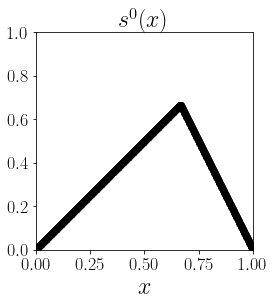

In [6]:
x = np.linspace(xmin, xmax, nx)

## Create figure
plt.close()
fig, ax = plt.subplots()
ax.set_xlim([xmin,xmax])
ax.set_ylim([0,1])
ax.set_aspect(1)

## Initial plots
s_plot = ax.plot(x,s0,'ko')[0]
ax.set_xlabel('$x$', fontsize=mathtextsize)
ax.set_title('$s^0(x)$', fontsize=mathtextsize)

fig.savefig(write_directory + '/' + name + '_s0.pdf')
plt.show()

### Plot of $w^0_i(x)$

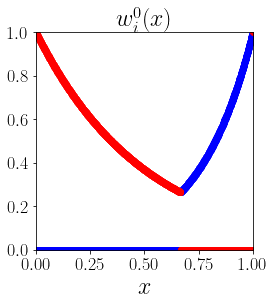

In [7]:
## Create figure
plt.close()
fig, ax = plt.subplots()
ax.set_xlim([xmin,xmax])
ax.set_ylim([0,1])
ax.set_aspect(1)

mode1w = ax.plot(x,w0[:,0],'bo')[0]
mode2w = ax.plot(x,w0[:,1],'ro')[0]
ax.set_xlabel('$x$', fontsize=mathtextsize)
ax.set_title('$w^0_i(x)$', fontsize=mathtextsize)

fig.savefig(write_directory + '/' + name + '_w0.pdf')
plt.show()